# House Price Prediction using Linear Regression

**Goal:** Predict house prices based on features like location, area, bedrooms, etc.


 Step 1: Load the Dataset

In [1]:
# Step 1: Load Required Libraries
import pandas as pd

# Step 1: Load Dataset
df = pd.read_csv("house_data.csv")

# Step 1: Display basic info
print("🔹 Dataset Shape:", df.shape)
print("\n🔹 First 5 rows:")
display(df.head())

# Step 1: Dataset Info
print("\n🔹 Dataset Info:")
print(df.info())

# Step 1: Check for Missing Values
print("\n🔹 Missing Values:")
print(df.isnull().sum())

# Step 1: Statistical Summary
print("\n🔹 Statistical Summary:")
display(df.describe())


🔹 Dataset Shape: (1999, 9)

🔹 First 5 rows:


,Serial#,Property_type,Price,Location,City,bathroom,purpose,bedroom,Area in Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0



🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Serial#        1999 non-null   int64  
 1   Property_type  1999 non-null   object 
 2   Price          1999 non-null   int64  
 3   Location       1999 non-null   object 
 4   City           1999 non-null   object 
 5   bathroom       1999 non-null   int64  
 6   purpose        1999 non-null   object 
 7   bedroom        1999 non-null   int64  
 8   Area in Marla  1999 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 140.7+ KB
None

🔹 Missing Values:
Serial#          0
Property_type    0
Price            0
Location         0
City             0
bathroom         0
purpose          0
bedroom          0
Area in Marla    0
dtype: int64

🔹 Statistical Summary:


,Serial#,Price,bathroom,bedroom,Area in Marla
count,1999.000000,1.999000e+03,1999.000000,1999.000000,1999.000000
mean,1508.106053,1.179838e+07,3.739870,3.507754,9.238619
std,860.050051,1.155921e+07,1.549764,1.323468,6.592933
min,0.000000,1.600000e+04,1.000000,0.000000,0.400000
25%,769.000000,2.500000e+06,3.000000,3.000000,5.000000
50%,1494.000000,8.500000e+06,4.000000,3.000000,7.600000
75%,2255.500000,1.760000e+07,5.000000,5.000000,10.700000
max,3003.000000,4.450000e+07,7.000000,6.000000,76.000000


Step 2: Data Preprocessing

In [2]:
# Make a copy of the original data
df_clean = df.copy()

#  Rename column for easier access
df_clean.rename(columns={"Area in Marla": "area_marla", "Property_type": "property_type", "City": "city", "Location": "location", "Price": "price"}, inplace=True)

#  Filter only 'For Sale' listings
df_clean = df_clean[df_clean['purpose'] == 'For Sale'].copy()

#  Drop irrelevant columns if present
if 'Serial#' in df_clean.columns:
    df_clean.drop(columns=['Serial#'], inplace=True)


#  Show result
print("🔹 Processed Data Sample:")
display(df_clean.head())

#  Check final structure
print("\n🔹 Cleaned Dataset Info:")
df_clean.info()


🔹 Processed Data Sample:


,property_type,price,location,city,bathroom,purpose,bedroom,area_marla
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0



🔹 Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1533 entries, 0 to 1998
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  1533 non-null   object 
 1   price          1533 non-null   int64  
 2   location       1533 non-null   object 
 3   city           1533 non-null   object 
 4   bathroom       1533 non-null   int64  
 5   purpose        1533 non-null   object 
 6   bedroom        1533 non-null   int64  
 7   area_marla     1533 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 107.8+ KB


 Step 3: Data Visualization & Exploration


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

1_ Distribution of House Prices

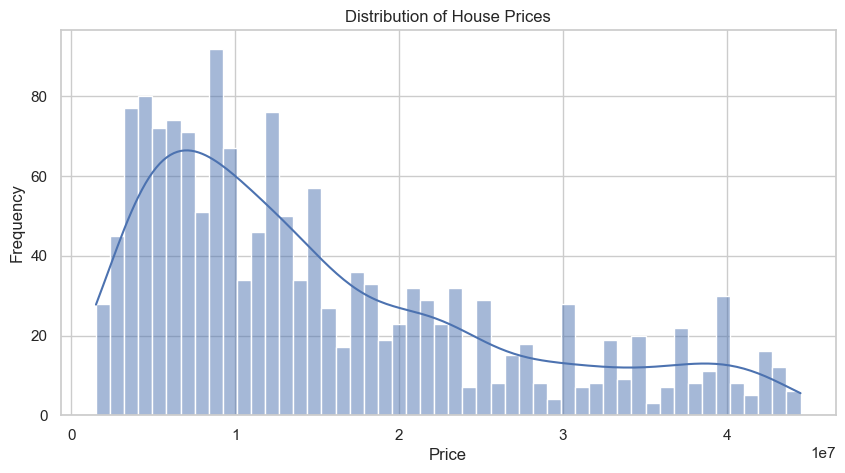

In [4]:
# Plotting the distribution of house prices
plt.figure(figsize=(10, 5))
sns.histplot(df_clean['price'], bins=50, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

2_ Price vs. Area

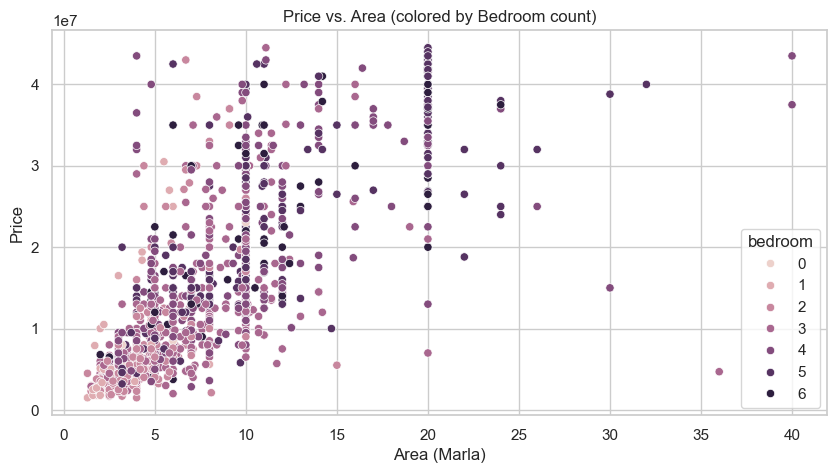

In [5]:

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_clean, x='area_marla', y='price', hue='bedroom')
plt.title("Price vs. Area (colored by Bedroom count)")
plt.xlabel("Area (Marla)")
plt.ylabel("Price")
plt.show()



3_ Price vs. Bedrooms

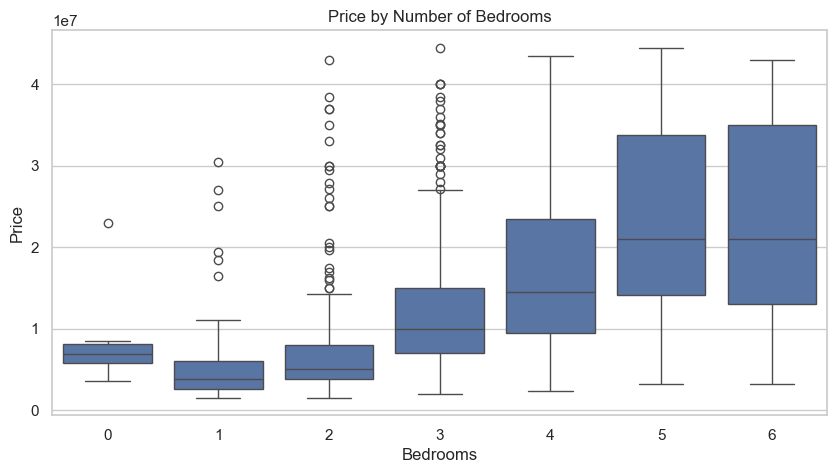

In [6]:

plt.figure(figsize=(10, 5))
sns.boxplot(x='bedroom', y='price', data=df_clean)
plt.title("Price by Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

4_ Correlation Heatmap

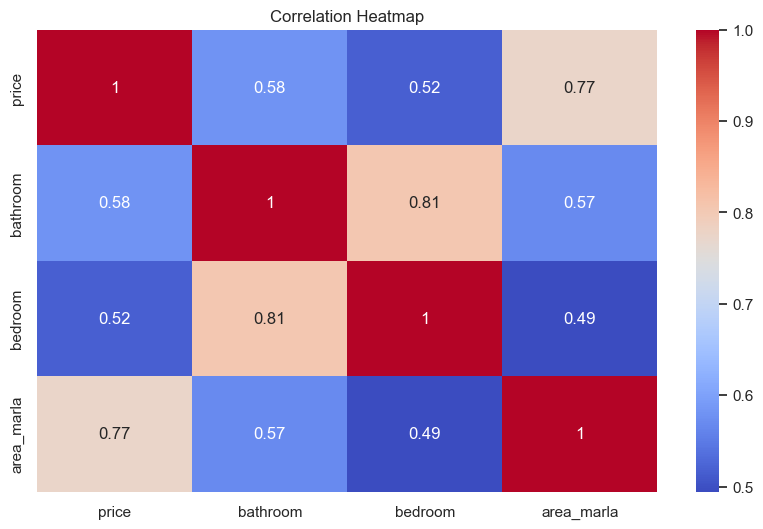

In [8]:
# Select only numeric columns for correlation
numeric_df = df_clean.select_dtypes(include=['int64', 'float64'])

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Encode Categorical Columns

In [16]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of your clean data
df_encoded = df_clean.copy()

# Encode categorical features
label_encoders = {}
categorical_cols = ['property_type', 'city', 'location']

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Save encoder for future decoding or prediction

# Use encoded data for training
features = ['area_marla', 'bedroom', 'bathroom', 'property_type', 'city', 'location']
X = df_encoded[features]
y = df_encoded['price']

Step 4: Model Training (Linear Regression)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [21]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)



 Evaluation Metrics

In [20]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f" Mean Absolute Error (MAE): {mae:,.0f}")
print(f" Root Mean Squared Error (RMSE): {rmse:,.0f}")

 Mean Absolute Error (MAE): 5,058,265
 Root Mean Squared Error (RMSE): 7,364,219


 Step 5: Model Evaluation & Visualization

 Predicted vs Actual Prices Plot

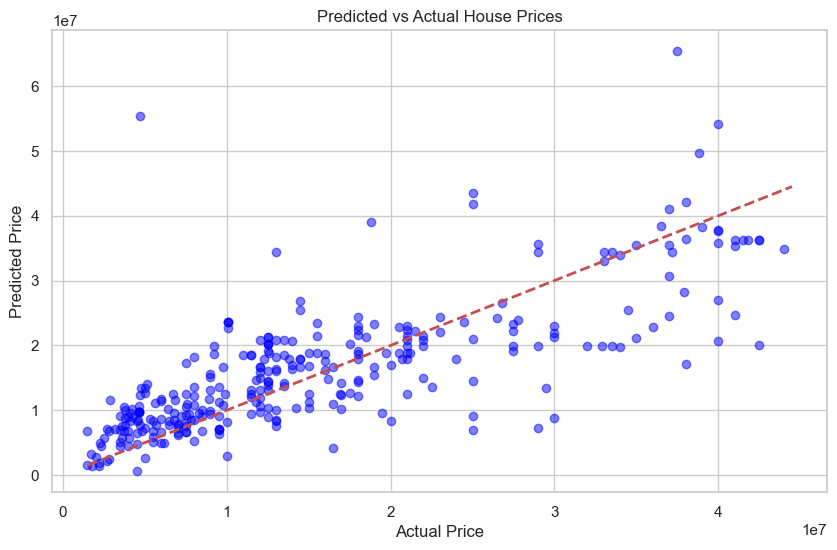

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # perfect prediction line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual House Prices")
plt.grid(True)
plt.show()


MAE & RMSE Bar Plot

C:\Users\PC Partner-User1\AppData\Local\Temp\ipykernel_10672\1179993001.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=errors, palette=colors)


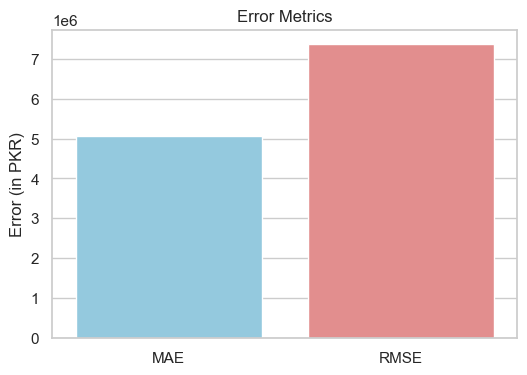

In [23]:
plt.figure(figsize=(6, 4))
errors = [mae, rmse]
labels = ['MAE', 'RMSE']
colors = ['skyblue', 'lightcoral']

sns.barplot(x=labels, y=errors, palette=colors)
plt.title("Error Metrics")
plt.ylabel("Error (in PKR)")
plt.show()


Feature Importance (Coefficients)

C:\Users\PC Partner-User1\AppData\Local\Temp\ipykernel_10672\2563063754.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coeff_df, x='Feature', y='Coefficient', palette='viridis')


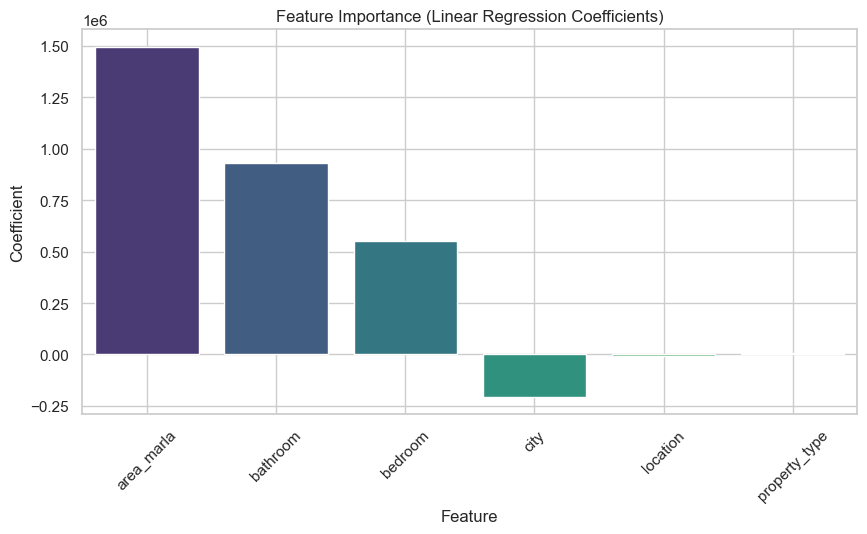

📊 Coefficient Table:
         Feature   Coefficient
0     area_marla  1.495450e+06
2       bathroom  9.304861e+05
1        bedroom  5.511419e+05
4           city -2.064270e+05
5       location -7.515339e+03
3  property_type  7.038919e+03


In [24]:
coeff_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=coeff_df, x='Feature', y='Coefficient', palette='viridis')
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

print("📊 Coefficient Table:")
print(coeff_df)


 Save the Trained Model

In [25]:
import joblib

# Save model to a file
joblib.dump(model, 'house_price_model.pkl')
print(" Model saved as 'house_price_model.pkl'")


 Model saved as 'house_price_model.pkl'


 Step 6: Make a Price Prediction

In [27]:
#  Use the same label_encoders from earlier step
#  Example input: 5 marla flat in Lahore, 3 bed, 2 bath, location = DHA

# You MUST use the exact same categories (or check if they exist)
new_data_raw = {
    'area_marla': 5,
    'bedroom': 3,
    'bathroom': 2,
    'property_type': 'Flat',
    'city': 'Lahore',
    'location': 'DHA Defence'
}

# Encode categorical inputs using saved label encoders
new_data_encoded = {
    'area_marla': new_data_raw['area_marla'],
    'bedroom': new_data_raw['bedroom'],
    'bathroom': new_data_raw['bathroom'],
    'property_type': label_encoders['property_type'].transform([new_data_raw['property_type']])[0],
    'city': label_encoders['city'].transform([new_data_raw['city']])[0],
    'location': label_encoders['location'].transform([new_data_raw['location']])[0]
}

# Create DataFrame for prediction
import pandas as pd
new_data_df = pd.DataFrame([new_data_encoded])

# Make prediction
predicted_price = model.predict(new_data_df)[0]
print(f" Predicted House Price: PKR {predicted_price:,.0f}")


 Predicted House Price: PKR 9,063,205


In [29]:
#  Use the same label_encoders from earlier step
#  Example input: 5 marla flat in Lahore, 3 bed, 2 bath, location = DHA

# You MUST use the exact same categories (or check if they exist)
new_data_raw = {
    'area_marla': 10,
    'bedroom': 3,
    'bathroom': 3,
    'property_type': 'House',
    'city': 'Islamabad',
    'location': 'DHA Defence'
}

# Encode categorical inputs using saved label encoders
new_data_encoded = {
    'area_marla': new_data_raw['area_marla'],
    'bedroom': new_data_raw['bedroom'],
    'bathroom': new_data_raw['bathroom'],
    'property_type': label_encoders['property_type'].transform([new_data_raw['property_type']])[0],
    'city': label_encoders['city'].transform([new_data_raw['city']])[0],
    'location': label_encoders['location'].transform([new_data_raw['location']])[0]
}

# Create DataFrame for prediction
import pandas as pd
new_data_df = pd.DataFrame([new_data_encoded])

# Make prediction
predicted_price = model.predict(new_data_df)[0]
print(f" Predicted House Price: PKR {predicted_price:,.0f}")


 Predicted House Price: PKR 17,890,835
